### Step 1 — Data Loading (Same as Augmentation Notebook)

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA_DIR = "../data/cifar10"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "train"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(DATA_DIR, "test"),
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical'
)

2026-02-21 21:47:15.774860: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-21 21:47:15.775112: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-21 21:47:15.807823: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-21 21:47:16.788021: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


### Step 2 — Deeper CNN Architecture
We add one more convolution block and slightly increase filters progressively.

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential()

# Block 1
model.add(layers.Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Block 2
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Block 3
model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

/home/aayushdai/Desktop/Projects/CIFAR_Classification/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-21 21:47:19.059177: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Step 3 — Compile

Same as before.

In [3]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Step 4 — Train (10 epochs first)
On CPU:

This will be slower than previous

But still manageable

In [4]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 69ms/step - accuracy: 0.4965 - loss: 1.4314 - val_accuracy: 0.5833 - val_loss: 1.2360
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.6491 - loss: 1.0012 - val_accuracy: 0.7128 - val_loss: 0.8336
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.7017 - loss: 0.8594 - val_accuracy: 0.7443 - val_loss: 0.7395
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.7364 - loss: 0.7651 - val_accuracy: 0.7478 - val_loss: 0.7608
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.7575 - loss: 0.7035 - val_accuracy: 0.7575 - val_loss: 0.7278
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.7731 - loss: 0.6582 - val_accuracy: 0.7380 - val_loss: 0.8117
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.7935 - loss: 0.6092 - val_accuracy: 0.7974 - val_loss: 0.6002
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 

### Evaluate

In [6]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7956 - loss: 0.6270
Test Accuracy: 0.7955999970436096


### Plot

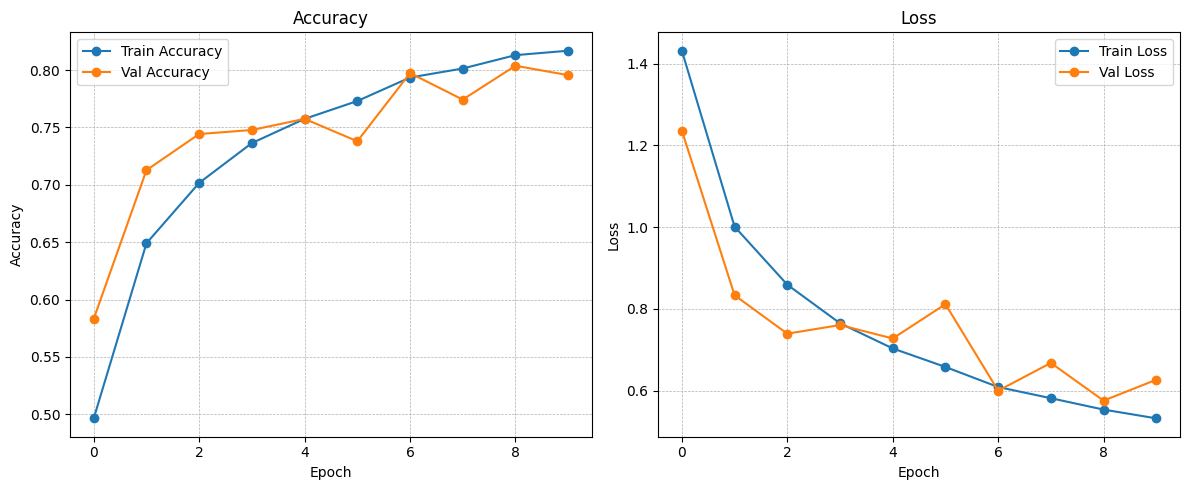

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='o', label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

Excellent. Now this is a real improvement.

# 📊 Result Summary

* Test Accuracy: **79.56%**
* Previous (BN + Dropout shallow): ~74.5%
* Augmentation only: ~73–74%
* Baseline: ~71%

So deeper architecture gave ~5% jump.
That confirms: model capacity was the bottleneck.

---

# 📈 Accuracy Curve Analysis

Observations:

* Train accuracy steadily increases to ~81–82%
* Validation accuracy peaks around ~80%
* Gap between train and validation is small (~2%)

Interpretation:

* Slight overfitting but controlled
* Regularization still working
* Model generalizes well
* No divergence

This is healthy behavior.

---

# 📉 Loss Curve Analysis

Observations:

* Train loss decreases smoothly
* Validation loss mostly decreases
* Some small oscillations (normal with augmentation)
* No explosion

Important:

Those small validation spikes are normal with:

* Data augmentation
* BatchNorm
* Small dataset

Nothing concerning here.

---

# Scientific Interpretation

You now have:

* Good generalization
* Stable training
* Proper regularization
* Increased representational power

This is a solid CIFAR-10 CNN for CPU training.

---

# Where You Stand

You’ve learned:

1. Baseline
2. Overfitting detection
3. Data augmentation
4. BatchNorm
5. Dropout
6. Increasing depth properly
7. Controlled experimentation

That is proper deep learning workflow.

---

# What Is The Next Logical Step?

Now improvements become incremental.

Best next options:

### Option A — Replace Flatten with GlobalAveragePooling2D

Reduces parameters, improves generalization.

### Option B — Train longer (20–30 epochs) with EarlyStopping

You likely can push beyond 82%.

### Option C — Add Learning Rate Scheduler

Often gives +2–3%.

### Option D — Evaluate per-class performance (Confusion Matrix)

Understand weaknesses.

---

If your goal is purely higher accuracy:

Best next move →
👉 Add EarlyStopping + train 25–30 epochs.

This model likely hasn’t converged fully in 10 epochs.

---

Your move:

* Optimize further?
* Or analyze model behavior deeper?
